![texto alternativo](https://www.moneyunder30.com/images/2016/02/securedcreditcards.jpg)

---

# **USO DE MACHINE LEARNING NA DETECÇÃO DE FRAUDES EM CARTÕES DE CRÉDITO**

---
---

Última atualização em 25 de dezembro de 2020

---

Diariamente, diversas operadoras de cartões de créditos captam milhares de clientes em todo o mundo, e o número de transações eletrônicas tem aumentado significativamente nos últimos anos. Para se ter uma ideia, de acordo com o Banco Central, apenas em 2017, as transações com cartões de crédito somaram cerca de R$ 674 bilhões, e o uso dessa forma de pagamento cresce a taxas substanciais ano após ano (VIEIRA, 2019).

A ideia dos cartões de créditos nasceu na década de 1920 nos Estados Unidos da América, quando algumas empresas privadas, especialmente do ramo hoteleiro e do petróleo, começaram a emitir cartões para possibilitar que seus clientes comprassem a crédito nos próprios estabelecimentos. Mais tarde, em 1950, Frank MacNamara aprimorou a ideia e lançou o Diners Club, focado na aceitação em massa e menores taxas.

**Tipos de Fraudes**

Dentre os diversos tipos de fraudes ocorridas no mercado, as mais comuns são (OLIVEIRA, 2016):

* **Invasão de Conta**: neste tipo de fraude, os criminosos obtêm informações pessoais de clientes, como número de contas e senhas, com o intuito de solicitar pagamentos, empréstimos e outros serviços bancários que estejam disponíveis;

* **Roubo de identidade**: neste caso, de posse de informações pessoais, os fraudadores abrem contas novas para tirarem proveito financeiro. Basicamente, é o uso ilegal de informações de terceiros para realizar uma solicitação fraudulenta;

* **Cartão perdido ou roubado**: aqui, os fraudadores tomam posse de um cartão perdido por seu verdadeiro titular, ou roubado pelo próprio fraudador, e realizam transações com ele;

* **Extravio**: ocorre quando cartões e suas respectivas senhas são roubados no processo de envio do emissor do cartão para o portador/cliente;

* **Falsificação de cartão**: falsificação, ou clonagem, de um cartão acontece quando um cartão é montado, sem a autorização do emissor, com os mesmos dados de um outro cartão que, por sua vez, foi emitido legitimamente.

**Detecção de Fraudes**

De acordo com o Serasa, apenas no ano de 2019, o Brasil sofreu uma tentativa de fraude a cada 6,5 segundos em ambientes online. E no ano de 2020, essas tentativas aumentaram devido ao crescente número de compras no comércio eletrônico durante a Pandemia da COVID-19.

Para tentar contornar e evitar esses problemas, as empresas de cartões de crédito têm investido cada vez mais em tecnologias que possam detectar essas possíveis fraudes e garantir a segurança dos dados de seus clientes.

## **Proposta deste Projeto**

A partir de dados de operações financeiras com cartões de crédito fornecidos por diversas empresas europeias, o principal objetivo deste artigo é implementar um modelo de Machine Learning que consiga prever quais transações são ou não fraudulentas, usando aprendizado supervisionado.

## **Obtenção dos Dados**

O dataset utilizado no presente trabalho reúne cerca de 290 mil dados de transações financeiras realizadas em um período de dois dias, fornecidos por empresas da Europa. Como é de se esperar, o número de operações fraudulentas é muito inferior em comparação às transações normais, resultando em um conjunto de dados altamente desbalanceado.

Um detalhe interessante é que as features são todas numéricas, e foram descaracterizadas (por problemas relacionados à privacidade e segurança dos clientes). Assim, os nomes das colunas são representados por [V1,V2,…,V28].

De acordo com a [página oficial](https://www.kaggle.com/mlg-ulb/creditcardfraud) onde os dados estão hospedados, o dataset passou por um procedimento conhecido como Análise dos Componentes Principais (*Principal Component Analysis - PCA*), cujo objetivo é obter uma simplificação do dataset através da redução da dimensão dos dados, extraindo as partes mais relevantes do conjunto de dados. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas [V1,V2,…,V28].

## **Análise Exploratória**

Na maior parte dos projetos de Data Science, uma das primeiras etapas, e a que mais consume tempo, é a análise exploratória de dados.

Esta etapa nos permite extrair as principais informações do conjunto de dados, nos auxiliando a entender o comportamento dos dados e quais os passos seguintes devem ser tomados para encontrar as soluções desejadas e também implementar os modelos de *Machine Learning*.

Inicialmente, precisamos importar as principais bibliotecas que serão utilizadas ao longo da resolução do problema, que são:

* Pandas;
* Matplotlib;
* Seaborn; e
* Numpy.

Caso haja a necessidade de utilizar alguma outra *lib*, como *Scikit-Learn*, será importada ademais. 

In [1]:
# IMPORTAÇÃO DAS PRINCIPAIS BIBLIOTECAS PARA ANÁLISE DE DADOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style()

In [2]:
# IMPORTAÇÃO DO DATASET

df = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')

In [3]:
# VISUALIZANDO AS PRIMEIRAS LINHAS DO DATASET

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A partir da visualização das primeiras cinco linhas do conjunto de dados, pode-se perceber que a variável alvo (*target*) é a coluna `Class`, que possui os valores **0** e **1**, onde representam **transação normal** e **transação fraudulenta**, respectivamente.

Também é possível observar que as variáveis `Time` e `Amount` tiveram seus valores originais preservados. E que as demais variáveis V1,..,V28, tiveram suas nomenclaturas modificadas pelo método PCA.

**Agora que já sabemos a forma geral do conjunto de dados, podemos extrair alguma informações básicas.**

In [4]:
# TAMANHO DO CONJUNTO DE DADOS

print('Linhas: {}'.format(df.shape[0]))
print('Colunas: {}'.format(df.shape[1]))

Linhas: 284807
Colunas: 31


Como mostrado abaixo, verifica-se, usando o comando `.isnull`, que não há valores ausentes ou os dados que precisem de tratamento específico no *dataset*, o que representa uma boa qualidade do conjunto de dados.

In [5]:
# VALORES AUSENTES

((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Pode-se extrair informações estatísticas básicas, seja do conjunto de dados inteiro ou de cada coluna separadamente. Por exemplo, para visualizar o resumo estatísticos de todas as variáveis juntas, usa-se a função '.describe'.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Através do resumo estatístico mostrado acima, pode-se perceber que as variáveis transformadas pelo método PCA (*V1,...,V2*) não apresentam valores fora do comum, aparentemente. Isso também é verificado para a variável `Time`.

Já para a variável `Amount`, referente ao valor das transações (normais e fraudes), possui uma média de 88.34, apresentando o valor máximo de 25691.16.

Em geral, o número de transações financeiras fraudulentas correspondem a uma pequena fração do total de transações. No caso do *dataset* utilizado no presente projeto, essa fração corresponde à 0,17% do total, como pode ser observado através do gráfico de barras abaixo.

A princípio, esse fato pode ser prejudicial ao desempenho do modelo de *Machine Learning*, pois são classes que apresentam quantidades de dados muito discrepantes. Contudo, isso pode ser resolvido facilmente aplicando método para o balanceamento de dados, como será visto mais adiante.

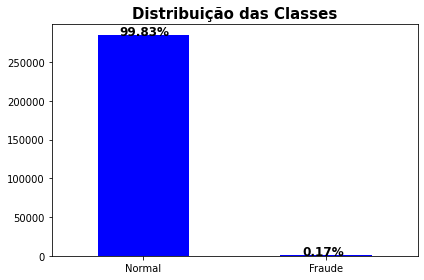

In [7]:
fig, ax = plt.subplots(figsize = (6,4))
ax = df.Class.value_counts().plot(kind = 'bar', color = 'blue')
ax.set_title('Distribuição das Classes', fontsize = 15, loc ='center', weight = 'bold')
ax.set_xticklabels(['Normal' , 'Fraude'], rotation = 0)
ax.patch.set_facecolor('white')

total = []

for i in ax.patches:
    total.append(i.get_height())

soma = sum(total)

for i in ax.patches:
    ax.text(i.get_x() + .12, i.get_height() - 50,
            str(round((i.get_height()/soma)*100, 2)) + '%',
            fontsize = 12, color = 'black', weight = 'bold')
    
plt.tight_layout()

In [8]:
# QUANTIDADE DE DADOS EM CADA CLASSE

print('Normais: ', df[df.Class == 0].shape[0])
print('\nFraudes: ', df[df.Class == 1].shape[0])

Normais:  284315

Fraudes:  492


O próximo passo da análise exploratória foi verificar se existem *outliers* nos dados, levando em consideração o parão dos dados referentes às transações financeiras em relação à variável `Amount`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


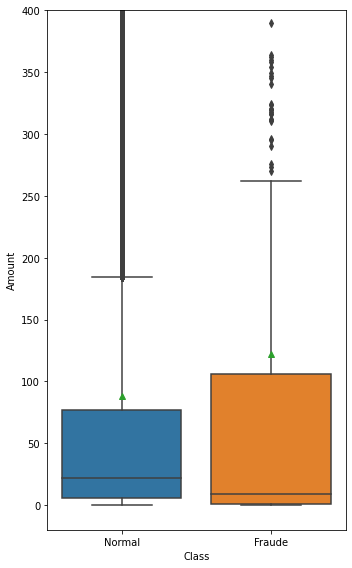

In [9]:
fig, ax = plt.subplots(figsize = (5,8), sharex = True)

sns.boxplot(df.Class, df.Amount, showmeans = True, ax = ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

Como pode-se perceber, as distribuições são diferentes para cada classe observada, o que pode ser um aspecto positivo para o treinamento e teste do modelo de *Machine Learning*.

De fato, existem *outliers* na variável `Amount`, o que pode ser tratado com a padronização dos dados.

## **Preparação dos Dados**

Após realizar a análise exploratória e extrair as principais informações do conjunto de dados, a próxima etapa é fazer a preparação e o tratamento das variáveis que irão alimentar o modelo de *Machine Learning*. O modelo preditivo a ser implementado será de Aprendizado Supervisionado.


Nesta etapa, deve-se fazer os ajustes finais dos dados. Esses ajustes envolvem a padronização das *features*, criação de novas variáveis, limpeza dos dados, separação do dataset, etc.

Para alimentar o modelo de Machine Learning, é necessário separar a variável alvo (dependente) das demais variáveis (independentes).

Por padrão, é comum fazer a divisão do conjunto de dados em variáveis nomeadas como X e y. Este projeto seguiu a mesma ideia.

### **Padronização dos Dados**

**A variável `Amount` receberá uma atenção especial nesta etapa, uma vez que ela apresenta *outliers*. Assim, é fundamental realizar a padronização dessa variável. O mesmo processo será realizado para a coluna `Time`, por ela possuir valores numéricos diferentes dos padrões das demais variáveis. Para isso, pode-se utilizar o método *StandardScaler*.**

In [10]:
# IMPORTAÇÃO DAS FERRAMENTAS PARA O PRÉ-PROCESSAMENTO DOS DADOS

from sklearn.preprocessing import StandardScaler

In [11]:
# CRIANDO UMA CÓPIA DO DATASET ORIGINAL

df_pdz = df.copy()

In [12]:
# PADRONIZAÇÃO DAS VARIÁVEIS AMOUNT E TIME

pdz = StandardScaler()

df_pdz['amount_pdz'] = pdz.fit_transform(df_pdz['Amount'].values.reshape(-1, 1))
df_pdz['time_pdz'] = pdz.fit_transform(df_pdz['Time'].values.reshape(-1, 1))

# ELIMINANDO AS VARIÁVEIS ANTIGAS

df_pdz.drop(['Time', 'Amount'], axis=1, inplace=True)

In [13]:
# VISUALIZANDO O RESULTADO

df_pdz.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_pdz,time_pdz
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### **Divisão dos Dados em Treino e Teste**

In [14]:
# SEPARAÇÃO DAS VARIÁVEIS EM DEPENDENTE E INDEPENDENTE

X = df_pdz.drop(['Class'], axis = 1)
y = df_pdz.Class

# DIVISÃO DOS DADOS EM TREINO E TESTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, stratify = y, shuffle=True)

Neste ponto, após a divisão dos dados, pode-se implementar o modelo com os dados desbalanceados. A ideia é comparar o desempenho do método frente às duas situações: dados desbalanceados e balanceados.

**MODELO COM OS DADOS DESBALANCEADOS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


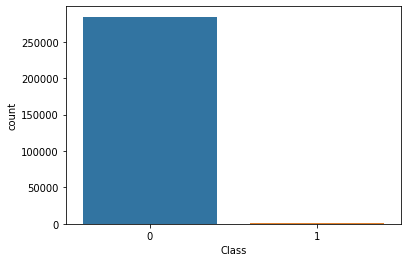

In [15]:
# VISUALIZANDO AS CLASSES DA VARIÁVEL ALVO

sns.countplot(y)

In [16]:
# MODELO RANDOM FOREST PARA CLASSIFICAÇÃO

from sklearn.ensemble import RandomForestClassifier

In [17]:
# INSTANCIANDO O MODELO

rfc_model = RandomForestClassifier(criterion = 'entropy', random_state = 42, oob_score = True)

In [18]:
# IMPORTANDO MÉTRICAS DE AVALIAÇÃO

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

É muito provável que ao utilizar os dados desbalanceados, a acurácia obtida seja quase 100%. É importante enfatizar que isso não significa que o modelo está tendo um bom desempenho necessariamente, pois além da acurácia não ser a forma definitiva de avaliar os modelos, pode estar ocorrendo alguns problemas. Na verdade, é provável que essa acurácia seja resultado de o modelo ter sido enviesado, pois o modelo terá se adaptado a identificar melhor apenas os dados da classe majoritária do conjunto de dados.

Para tentar contornar o problema, pode-se fazer o balanceamento dos dados e fazer o treino e teste do modelo novamente.

### **Balanceamento dos Dados**

Quando se trata de balanceamento de dados, pode-se aplicar duas abordagens: *Undersampling* e *Oversampling*.

No primeiro caso, a técnica consiste em reduzir os exemplos da classe majoritária de forma aleatória. Já o segundo, faz réplicas dos dados da classe minoritária.

No presente projeto, aplicacou-se a técnica de Oversampling, usando algoritmo Smote para esta finalidade.

In [19]:
from imblearn.over_sampling import SMOTE

# INSTANCIANDO O ALGORITMO
smt = SMOTE()

# APLICANDO O OVERSAMPLING
X_train_os, y_train_os = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Vale ressaltar a importância de aplicar o balanceamento apenas para os dados de treino. Pois, os dados de teste devem permanecer inalterados.**

In [21]:
print(pd.Series(y_train_os).value_counts())

1    204707
0    204707
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


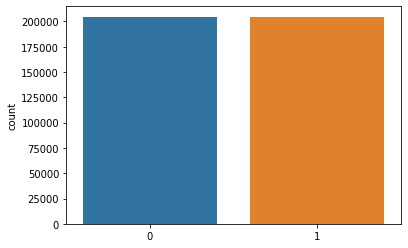

In [22]:
# VISUALIZANDO AS CLASSES DA VARIÁVEL ALVO BALANCEADA

sns.countplot(y_train_os)

Como pode-se observar acima, de fato, o método aplicado foi capaz de balancear as classes da variável independente. Com isso, o modelo de *Machine Learning* pode ser treinado e testado novamente.

**MODELO COM OS DADOS BALANCEADOS**

Como as bibliotecas já foram importadas anteriormente, pode-se aplicar o modelo de forma mais direta.

In [23]:
# TREINANDO O MODELO

rfc_model.fit(X_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
# PREVISÃO

y_pred = rfc_model.predict(X_test)

In [25]:
print('Random Forest')

# ACURÁCIA

print('\n[Acurácia]:', accuracy_score(y_test, y_pred))

# OOB DO RANDOM FOREST

print('\n[Out-of-Bag]:', rfc_model.oob_score_)

Random Forest

[Acurácia]: 0.9995234870714519

[Out-of-Bag]: 0.999916954476398


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79608
           1       0.87      0.86      0.86       138

    accuracy                           1.00     79746
   macro avg       0.93      0.93      0.93     79746
weighted avg       1.00      1.00      1.00     79746



In [27]:
# VISUALIZANDO A MATRIZ DE CONFUSÃO

pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,79590,18
pos,20,118


## **Conclusão**

Como pode-se observar nos resultados, apesar de a acurácia do modelo ter sido próxima de 100%, outros parâmetros mais importantes e decisivos para a avaliação do desempenho do modelo não foram tão bons. 

Por exemplo, os resultados mostraram para a classe 1, que representa os casos em que as transações financeiras são fraudulentas, o modelo não apresentou um desempenho tão bom quando comparado à situações onde as transações eram normais. As métricas analisadas foram:

* **Precision** — Precisão de previsões positivas
* **Recall** — Fração de positivos que foram identificados corretamente.
* **f1-score** — representa a média harmônica entre precision e recall, sendo 0 o pior valor e 1 o melhor.

No geral, o modelo foi capaz de identificar de maneira satisfatória as transações que, de fato, eram fraudulentas, um aspecto muito importante para este tipo de problema, afinal, o objetivo é justamente conseguir identificar as fraudes.

Como discutido anteriormente, o modelo realmente pode ter sido enviesado pela classe majoritária com os dados desbalanceados e, foi possível contornar isso usando técnicas apropriadas.

O modelo final alcançou uma **acurácia de 99,95%**, combinado aos bons resultados das demais métricas. Em particular, para o Random Forest, o parâmetro [***Out-of-Bag***](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710) é bastante relevante, e o modelo também apresentou um bom resultado para essa métrica, atingindo **99,99%**.

No geral, o modelo alcançou um ótimo desempenho, mas é importante ressaltar que existem outras técnicas para procurar melhorar esse resultado, seja por meio da implementação de outros modelo de classificação ou o ajuste de hiperparâmetros do modelo atual, por exemplo. 